# Hypothesis

- A production of a certain crops during a year have a direct impact on carbon emissions for that year. There is a crop type which has a greatest level of effect on carbon emissions so that as that crop is produced in higher quanities, carbon emissions grow as a direct result.   




In [686]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

emissions = pd.read_csv('./data/carbon_emissions.csv')

crops_by_group = pd.read_csv('./data/spain_crops_groups.csv')

In [687]:
crops_by_group = crops_by_group.drop(labels=['Domain Code',  'Area Code (M49)', 'Area', 'Year Code', 'Domain', 'Element Code'],axis=1)


misc = crops_by_group[['Year']]

vegetables = crops_by_group[crops_by_group['Item'] == 'Vegetables Primary']
vegetables = vegetables[['Year', 'Value']]
vegetables.columns = vegetables.columns.str.replace('Value', 'Vegetables')

treeNuts = crops_by_group[crops_by_group['Item'] == 'Treenuts, Total']
treeNuts = treeNuts[['Year', 'Value']]
treeNuts.columns = treeNuts.columns.str.replace('Value', 'Treenuts')

sugar = crops_by_group[crops_by_group['Item'] == 'Sugar Crops Primary']
sugar = sugar[['Year', 'Value']]
sugar.columns = sugar.columns.str.replace('Value', 'Sugar Crops')

rootsTubers = crops_by_group[crops_by_group['Item'] == 'Roots and Tubers, Total']
rootsTubers = rootsTubers[['Year', 'Value']]
rootsTubers.columns = rootsTubers.columns.str.replace('Value', 'Roots and Tubers')

oilOil = crops_by_group[crops_by_group['Item'] == 'Oilcrops, Oil Equivalent']
oilOil = oilOil[['Year', 'Value']]
oilOil.columns = oilOil.columns.str.replace('Value', 'Oilcrops, Oil')

pulses = crops_by_group[crops_by_group['Item'] == 'Pulses, Total']
pulses = pulses[['Year', 'Value']]
pulses.columns = pulses.columns.str.replace('Value', 'Pulses')

oilCakes = crops_by_group[crops_by_group['Item'] == 'Oilcrops, Cake Equivalent']
oilCakes = oilCakes[['Year', 'Value']]
oilCakes.columns = oilCakes.columns.str.replace('Value', 'Oilcrops, Cake')

fruit = crops_by_group[crops_by_group['Item'] == 'Fruit Primary']
fruit = fruit[['Year', 'Value']]
fruit.columns = fruit.columns.str.replace('Value', 'Fruit')

fibre = crops_by_group[crops_by_group['Item'] == 'Fibre Crops, Fibre Equivalent']
fibre = fibre[['Year', 'Value']]
fibre.columns = fibre.columns.str.replace('Value', 'Fibre')


citrusFruit = crops_by_group[crops_by_group['Item'] == 'Citrus Fruit, Total']
citrusFruit = citrusFruit[['Year', 'Value']]
citrusFruit.columns = citrusFruit.columns.str.replace('Value', 'Citrus Fruits')

cereal = crops_by_group[crops_by_group['Item'] == 'Cereals, primary']
cereal = cereal[['Year', 'Value']]
cereal.columns = cereal.columns.str.replace('Value', 'Cereal')




crops = cereal.merge(citrusFruit, how='outer', on='Year')
crops = crops.merge(fibre, how='outer', on='Year')
crops = crops.merge(fruit, how='outer', on='Year')
crops = crops.merge(vegetables, how='outer', on='Year')
crops = crops.merge(sugar, how='outer', on='Year')
crops = crops.merge(oilCakes, how='outer', on='Year')
crops = crops.merge(oilOil, how='outer', on='Year')
crops = crops.merge(pulses, how='outer', on='Year')
crops = crops.merge(rootsTubers, how='outer', on='Year')
crops = crops.merge(treeNuts, how='outer', on='Year')

crops_old = crops

In [688]:
# Predicting the values of Fibre, Oilcrops Cake, and Oilcrops Oil from the years 2018 to 2022 by using the average of the 5 years previous to the instance


crops_Fibre = crops['Fibre']
crops_OilCake = crops['Oilcrops, Cake']
crops_Oil = crops_old['Oilcrops, Oil']


crops.at[57, "Fibre"] = (crops_Fibre[52:57].mean()).round(decimals=2)
crops.at[58, "Fibre"] = (crops_Fibre[53:58].mean()).round(decimals=2)
crops.at[59, "Fibre"] = (crops_Fibre[54:59].mean()).round(decimals=2)
crops.at[60, "Fibre"] = (crops_Fibre[55:60].mean()).round(decimals=2)
crops.at[61, "Fibre"] = (crops_Fibre[56:61].mean()).round(decimals=2)

crops.at[57, "Oilcrops, Cake"] = (crops_OilCake[52:57].mean()).round(decimals=2)
crops.at[58, "Oilcrops, Cake"] = (crops_OilCake[53:58].mean()).round(decimals=2)
crops.at[59, "Oilcrops, Cake"] = (crops_OilCake[54:59].mean()).round(decimals=2)
crops.at[60, "Oilcrops, Cake"] = (crops_OilCake[55:60].mean()).round(decimals=2)
crops.at[61, "Oilcrops, Cake"] = (crops_OilCake[56:61].mean()).round(decimals=2)

crops.at[57, "Oilcrops, Oil"] = (crops_Oil[52:57].mean()).round(decimals=2)
crops.at[58, "Oilcrops, Oil"] = (crops_Oil[53:58].mean()).round(decimals=2)
crops.at[59, "Oilcrops, Oil"] = (crops_Oil[54:59].mean()).round(decimals=2)
crops.at[60, "Oilcrops, Oil"] = (crops_Oil[55:60].mean()).round(decimals=2)
crops.at[61, "Oilcrops, Oil"] = (crops_Oil[56:61].mean()).round(decimals=2)



# display(crops_old[52:])






In [689]:
# # below we are finding the equations for the three crop types Oilcrops, Cake Oilcrops, Oil, and Fibre that have nan's
# # this equation will be used to imput values from 2018 to 2022

# # take all the raw production values from before 2018
# crops_before_2018 = crops_old[crops_old['Year'] < 2018]
# # now forget all the years before 2013, so we are sampling the last 5 years 2013 - 2017
# crops_2013_2018 = crops_before_2018[crops_before_2018['Year'] >= 2013]

# predict = crops_2013_2018[['Year', 'Oilcrops, Oil']]
# X = predict['Year']
# y = predict['Oilcrops, Oil']

# # fibreArr.plot.scatter(x='Year', y='Fibre')

# # train model
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=23)

# X_train = np.array(X_train).reshape(-1, 1)
# X_test = np.array(X_test).reshape(-1, 1)


# lr = LinearRegression()

# lr.fit(X_train, y_train)


# # these are the years we need
# missing_years = [[2018], [2019], [2020], [2021], [2022]]

# Y_pred_train1 = lr.predict(missing_years)
# # display(crops_2013_2018)
# # display(Y_pred_train1.round(decimals=2))

# # plt.scatter(missing_years, Y_pred_train1)
# plt.plot(missing_years, Y_pred_train1, color='red')


# crops_old.at[57, "Fibre"] = 105942.84

# # with pd.option_context('display.max_rows', None, "display.max_columns", None) :
# #     display(crops_old)

In [690]:

# The line directly below is responsible for standardizing the data for crops
# crops = preprocessing.scale(crops[['Cereal', 'Citrus Fruits', 'Fibre', 'Fruit', 'Vegetables', 'Sugar Crops', 'Oilcrops, Cake', 'Oilcrops, Oil', 'Pulses', 'Roots and Tubers', 'Treenuts']])
crops = pd.DataFrame(crops, columns=['Cereal', 'Citrus Fruits', 'Fibre', 'Fruit', 'Vegetables', 'Sugar Crops', 'Oilcrops, Cake', 'Oilcrops, Oil', 'Pulses', 'Roots and Tubers', 'Treenuts'])
crops.insert(0, 'Year', misc)




spainEmissions = emissions[emissions['country'] == 'Spain']
spainEmissions = spainEmissions.loc[:, spainEmissions.isnull().mean() < .3]
spainEmissions = spainEmissions[['country','year', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct']]
spainEmissions = spainEmissions[spainEmissions['year'] >= 1961]
spainEmissions.columns = spainEmissions.columns.str.replace('year', 'Year')

In [691]:

df = spainEmissions.merge(crops, how='outer', on='Year')
df1 = spainEmissions.merge(crops_by_group, how='outer', on='Year')

df.drop(columns=['co2_including_luc_growth_abs', 'co2_including_luc_growth_prct'], inplace=True)

df.to_csv('./data/workingData')
# df.plot(x='Year', y=['Cereal', 'Citrus Fruits', 'Fibre', 'Fruit', 'Vegetables', 'Sugar Crops', 'Oilcrops, Cake', 'Oilcrops, Oil', 'Pulses', 'Roots and Tubers', 'Treenuts'])

# sns.histplot(df, x='co2_including_luc')
# sns.kdeplot(df, x='co2_including_luc')

# df.plot.scatter(y='co2_including_luc', x='Cereal')
# df.plot.scatter(y='co2_including_luc', x='Citrus Fruits')
# df.plot.scatter(y='co2_including_luc', x='Fibre')
# df.plot.scatter(y='co2_including_luc', x='Fruit')
# df.plot.scatter(y='co2_including_luc', x='Vegetables')
# df.plot.scatter(y='co2_including_luc', x='Sugar Crops')
# df.plot.scatter(y='co2_including_luc', x='Oilcrops, Cake')
# df.plot.scatter(y='co2_including_luc', x='Oilcrops, Oil')
# df.plot.scatter(y='co2_including_luc', x='Pulses')
# df.plot.scatter(y='co2_including_luc', x='Roots and Tubers')
# df.plot.scatter(y='co2_including_luc', x='Treenuts')


# axes = pd.plotting.scatter_matrix(df)
# for ax in axes.flatten():
#     ax.xaxis.label.set_rotation(90)
#     ax.yaxis.label.set_rotation(0)
#     ax.yaxis.label.set_ha('right')

# with pd.option_context('display.max_rows', None, "display.max_columns", None) :
# display(df)

MSE = 2323.8622758088763
MAE = 40.34525247645582
R-squared = 0.027489434017552217


Text(0, 0.5, 'Co2 (millions of tons)')

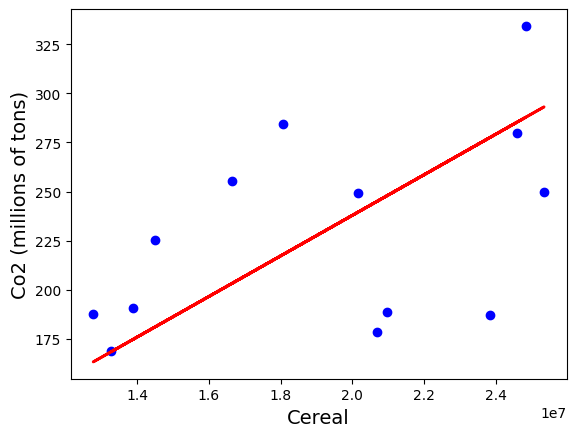

In [692]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_p = .2
seed = 123

X = df[['Cereal']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

linModel = LinearRegression()
linModel.fit(X_train,y_train)
y_pred = linModel.predict(X_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))



plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Cereal', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)


MSE = 1188.2469498447635
MAE = 29.885173748160902
R-squared = 0.5027318418350676


Text(0, 0.5, 'Co2 (millions of tons)')

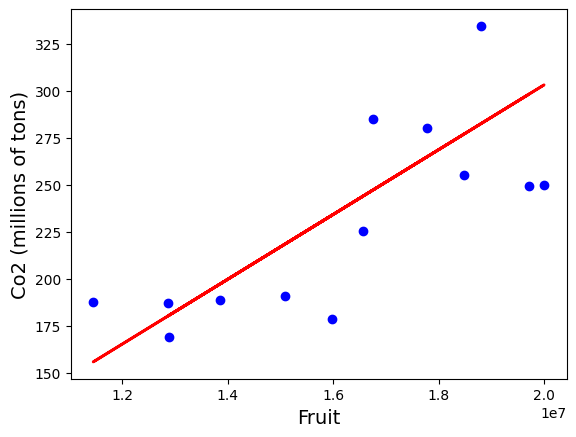

In [693]:

test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

linModel = LinearRegression()
linModel.fit(X_train,y_train)
y_pred = linModel.predict(X_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))



plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

MSE = 1243.9105018745656
MAE = 30.472561501616806
R-squared = 0.4794372632136844


Text(0, 0.5, 'Co2 (millions of tons)')

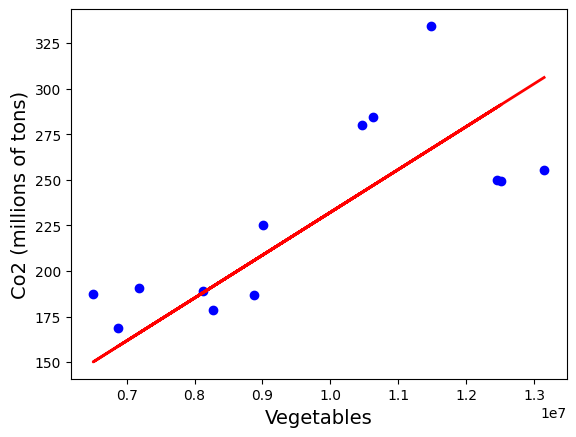

In [694]:

test_p = .2
seed = 123

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

linModel = LinearRegression()
linModel.fit(X_train,y_train)
y_pred = linModel.predict(X_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))



plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Vegetables', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

MSE = 5749.080138601919
MAE = 62.43074339606418
R-squared = -1.4059262193255857


Text(0, 0.5, 'Co2 (millions of tons)')

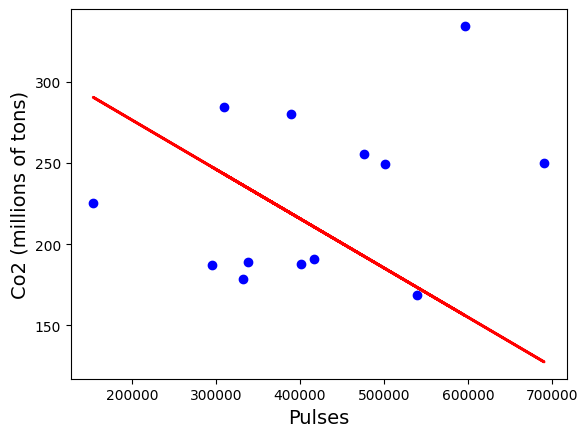

In [695]:

test_p = .2
seed = 123

X = df[['Pulses']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

linModel = LinearRegression()
linModel.fit(X_train,y_train)
y_pred = linModel.predict(X_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))



plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Pulses', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

In [696]:



def cereal_precentage():
    for ind in df.index:
        cereal_precents = []
        sum = df['Cereal'][ind] + df['Citrus Fruits'][ind] + df['Fibre'][ind] + df['Fruit'][ind] + df['Vegetables'][ind] + df['Sugar Crops'][ind] + df['Oilcrops, Cake'][ind] + df['Oilcrops, Oil'][ind] + df['Pulses'][ind] + df['Roots and Tubers'][ind] + df['Treenuts'][ind]
        precentageVal = (df['Cereal'] / sum).round(decimals=3)
        # precentageVal = (df['Cereal'] / sum)
        cereal_precents.insert(ind, precentageVal)
        return cereal_precents



cereal_precent = cereal_precentage()
cereal_precent = np.array(object=cereal_precent, ndmin=0)
cereal_precent= cereal_precent.ravel()
df.insert(column="Cereal_precent", value= cereal_precent, loc=4)

def fruit_precentage():
    for ind in df.index:
        fruit_precents = []
        sum = df['Cereal'][ind] + df['Citrus Fruits'][ind] + df['Fibre'][ind] + df['Fruit'][ind] + df['Vegetables'][ind] + df['Sugar Crops'][ind] + df['Oilcrops, Cake'][ind] + df['Oilcrops, Oil'][ind] + df['Pulses'][ind] + df['Roots and Tubers'][ind] + df['Treenuts'][ind]
        precentageVal = (df['Fruit'] / sum).round(decimals=3)
        fruit_precents.insert(ind, precentageVal)
        return fruit_precents



fruit_precent = fruit_precentage()
fruit_precent = np.array(object=fruit_precent, ndmin=0)
fruit_precent= fruit_precent.ravel()
df.insert(column="Fruit_precent", value= fruit_precent, loc=8)

def vegetables_precentage():
    for ind in df.index:
        vegetables_precents = []
        sum = df['Cereal'][ind] + df['Citrus Fruits'][ind] + df['Fibre'][ind] + df['Fruit'][ind] + df['Vegetables'][ind] + df['Sugar Crops'][ind] + df['Oilcrops, Cake'][ind] + df['Oilcrops, Oil'][ind] + df['Pulses'][ind] + df['Roots and Tubers'][ind] + df['Treenuts'][ind]
        precentageVal = (df['Vegetables'] / sum).round(decimals=3)
        vegetables_precents.insert(ind, precentageVal)
        return vegetables_precents



vegetables_precent = vegetables_precentage()
vegetables_precent = np.array(object=vegetables_precent, ndmin=0)
vegetables_precent= vegetables_precent.ravel()
df.insert(column="Vegetables_precent", value= vegetables_precent, loc=10)

# df.plot.scatter(y='co2_including_luc', x='Vegetables')
# df.plot.scatter(y='co2_including_luc', x='Vegetables_precent')

# df.plot.scatter(y='co2_including_luc', x='Cereal')
# df.plot.scatter(y='co2_including_luc', x='Cereal_precent')

# df.plot.scatter(y='co2_including_luc', x='Fruit')
# df.plot.scatter(y='co2_including_luc', x='Fruit_precent')






MSE = 2323.8622758088763
MAE = 40.34525247645582
R-squared = 0.027489434017552217


Text(0, 0.5, 'Co2 (millions of tons)')

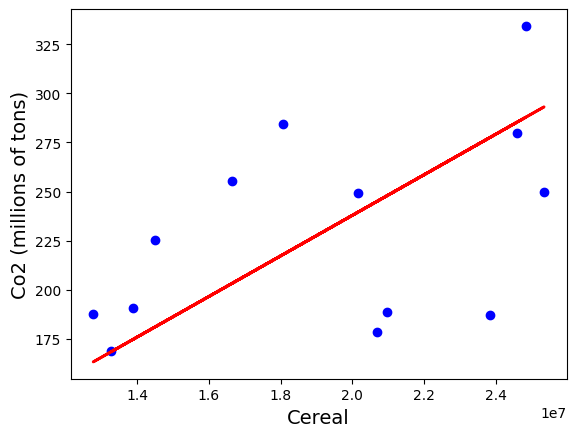

In [697]:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_p = .2
seed = 123

X = df[['Cereal']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

linModel = LinearRegression()
linModel.fit(X_train,y_train)
y_pred = linModel.predict(X_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))



plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Cereal', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

MSE = 2328.522073065179
MAE = 40.409943515089516
R-squared = 0.025539360592691795


Text(0, 0.5, 'Co2 (millions of tons)')

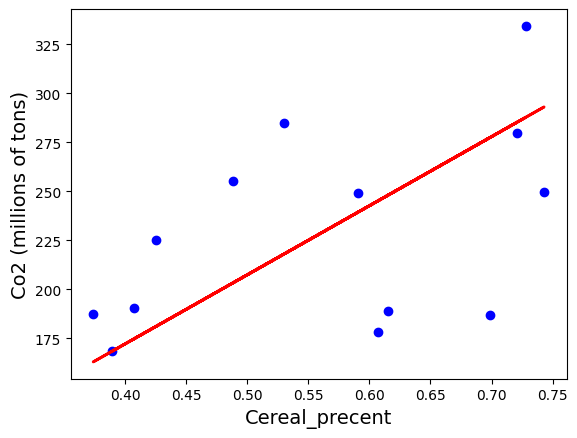

In [698]:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_p = .2
seed = 123

X = df[['Cereal_precent']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

linModel = LinearRegression()
linModel.fit(X_train,y_train)
y_pred = linModel.predict(X_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))



plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Cereal_precent', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

MSE = 1834.7589675181894
MAE = 33.68383192962836
R-squared = 0.6404335376159729


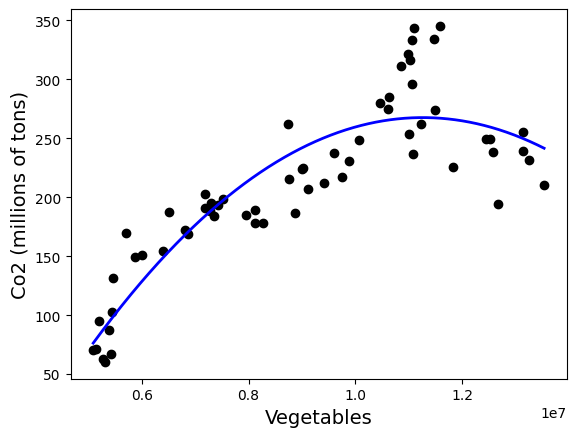

In [699]:

test_p = .2
seed = 123

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(xPoly, y)

plt.scatter(X, y, color='black')
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Vegetables', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)


linModel = LinearRegression()
linModel.fit(X,y)
y_pred = linModel.predict(X)

print('MSE =', mean_squared_error(y, y_pred))
print('MAE =', mean_absolute_error(y, y_pred))
print('R-squared =', r2_score(y, y_pred))





MSE = 1832.3830609387267
MAE = 33.64320055407683
R-squared = 0.6408991553558813


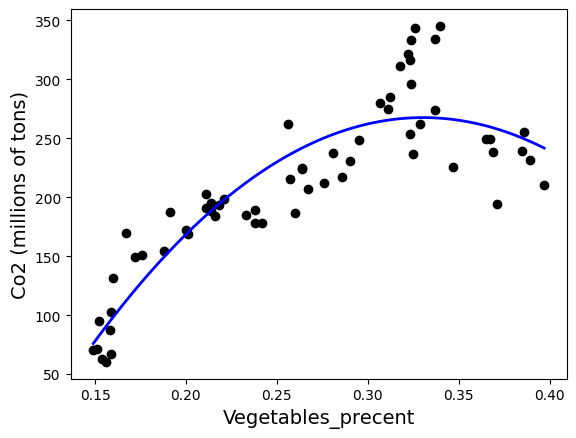

In [700]:


test_p = .2
seed = 123

X = df[['Vegetables_precent']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(xPoly, y)

plt.scatter(X, y, color='black')
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Vegetables_precent', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)


linModel = LinearRegression()
linModel.fit(X,y)
y_pred = linModel.predict(X)

print('MSE =', mean_squared_error(y, y_pred))
print('MAE =', mean_absolute_error(y, y_pred))
print('R-squared =', r2_score(y, y_pred))